# Importing Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importing Dataset

In [2]:
dataset=pd.read_csv("/content/Country-data (1).csv")
data=dataset.copy()

# Data Understanding

In [3]:
# see the first 5 rows 
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# see the last 5 rows
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
# check types of data
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
# check null values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
data.apply(lambda x: x.nunique())

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [11]:
# check statistic properties of the dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Analysis

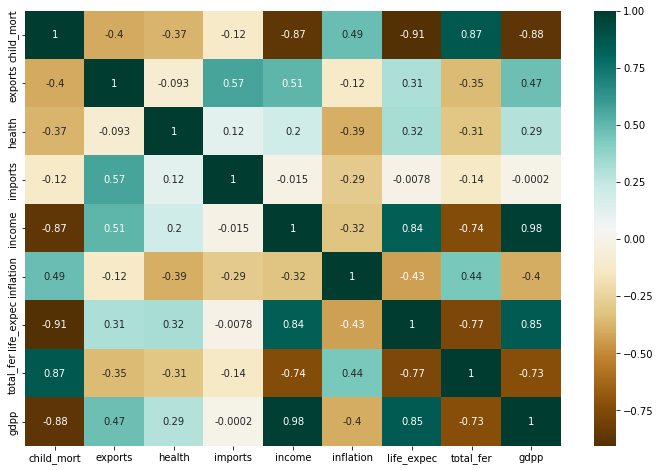

In [13]:
# check correlation among variables
plt.figure(figsize = (12,8))  
sns.heatmap(data.corr(method='spearman'),annot = True, cmap='BrBG')
plt.show()

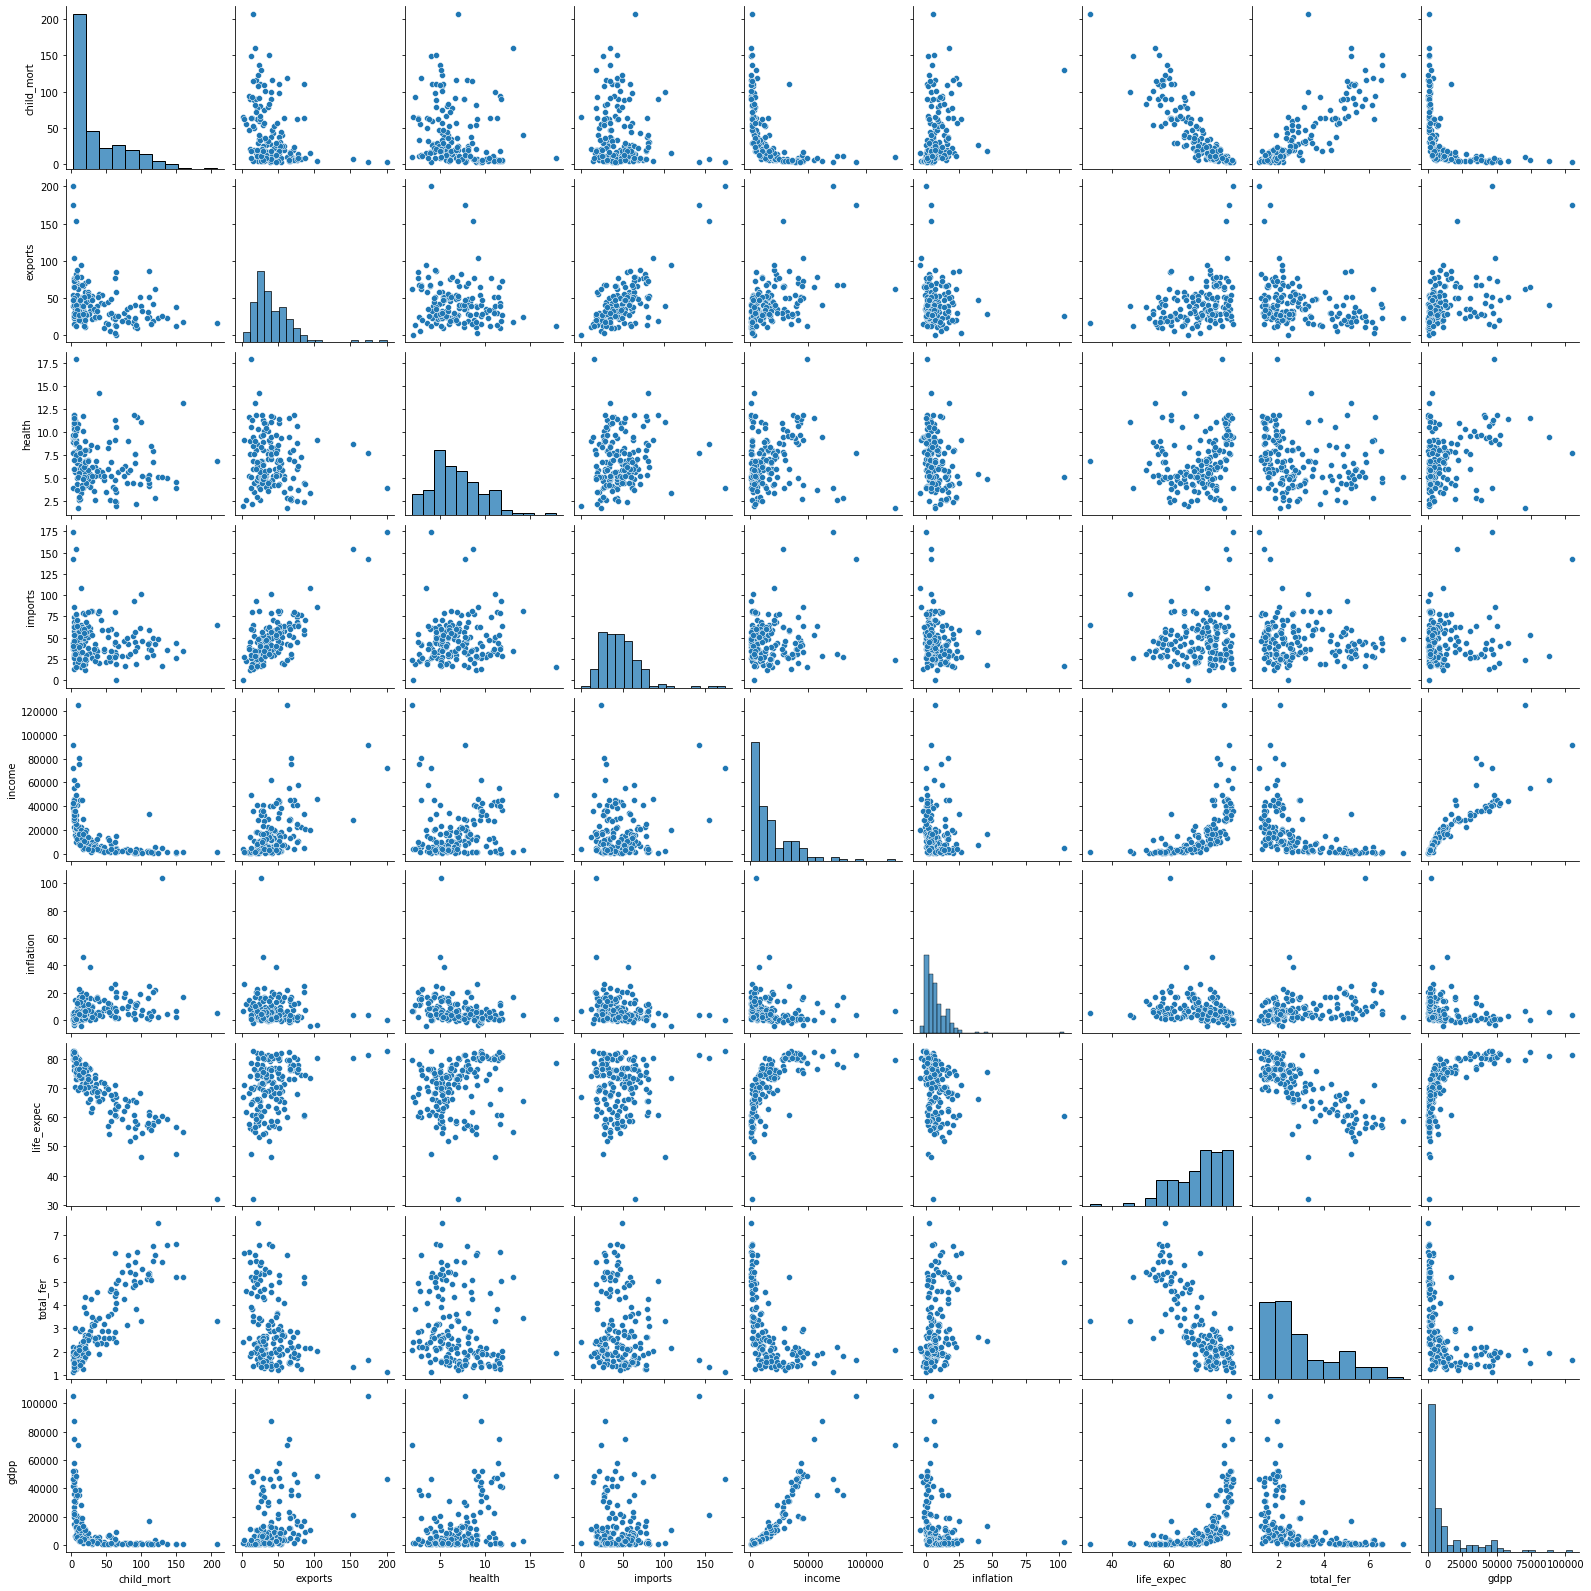

In [14]:
# checking distribution and relationships among variables
sns.pairplot(data)
plt.show()

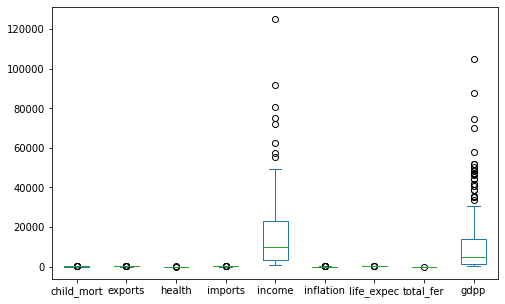

In [18]:
# to check outliers through box plot 
data.plot(kind='box', figsize=(8, 5))

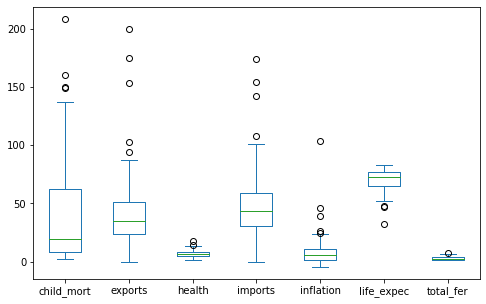

In [19]:
data[["child_mort", "exports", "health", "imports", "inflation", "life_expec", "total_fer"]].plot(kind='box', figsize=(8, 5))

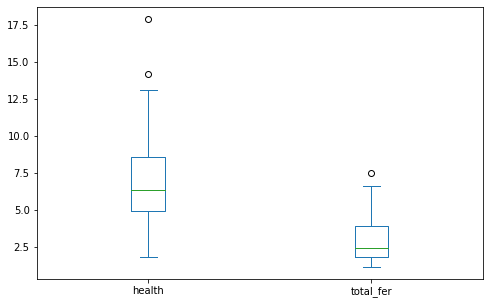

In [20]:
data[["health", "total_fer"]].plot(kind='box', figsize=(8, 5))

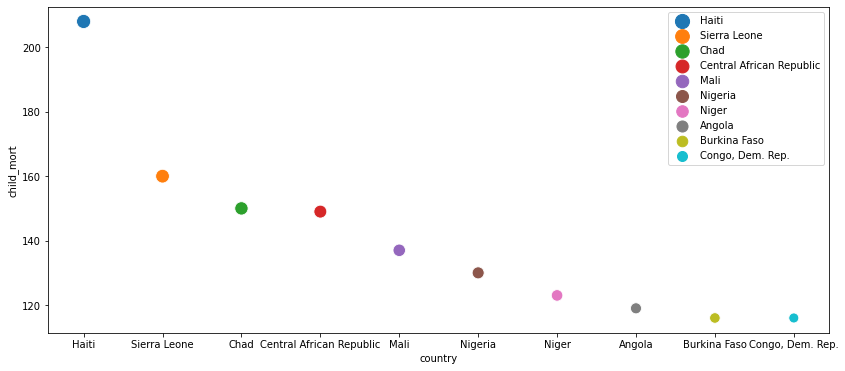

In [33]:
#check 10 largest countries over the numeric columns
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="child_mort", 
                data=data.nlargest(10,'child_mort'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

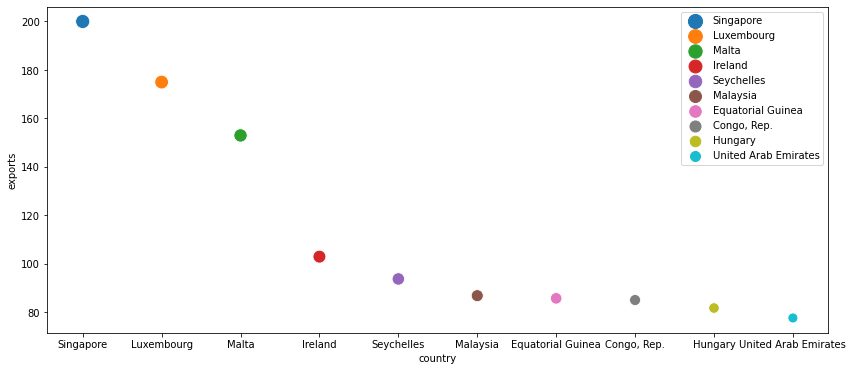

In [34]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="exports", 
                data=data.nlargest(10,'exports'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

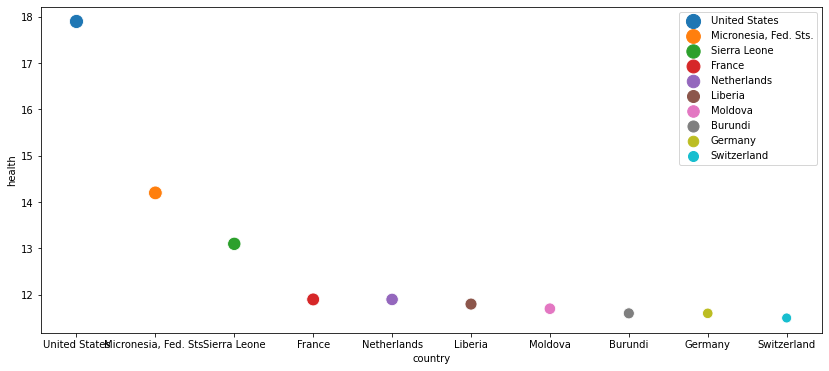

In [35]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="health", 
                data=data.nlargest(10,'health'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

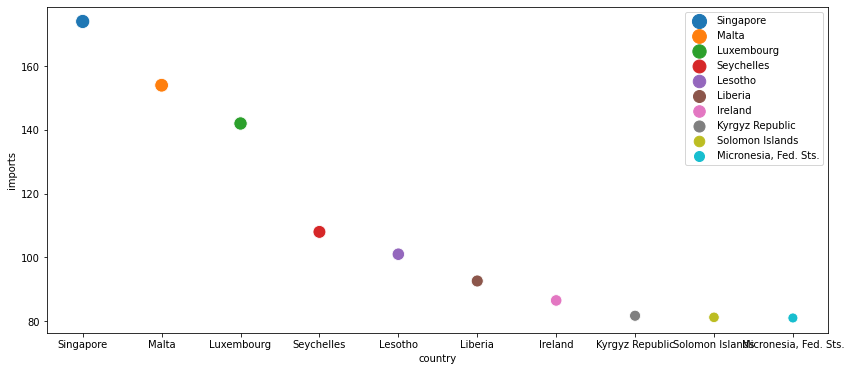

In [37]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="imports", 
                data=data.nlargest(10,'imports'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

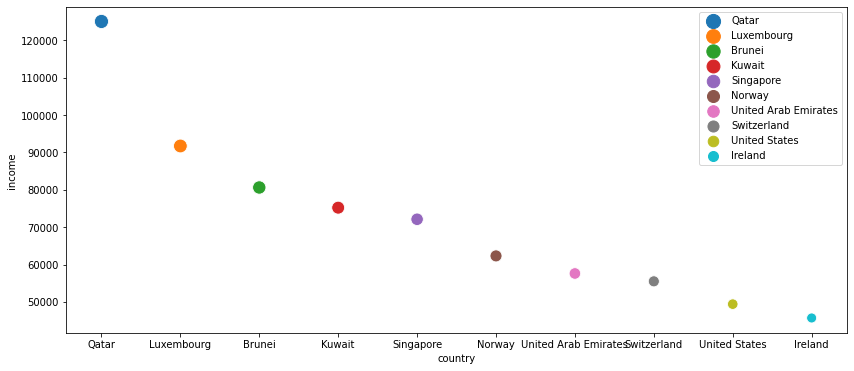

In [38]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="income", 
                data=data.nlargest(10,'income'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

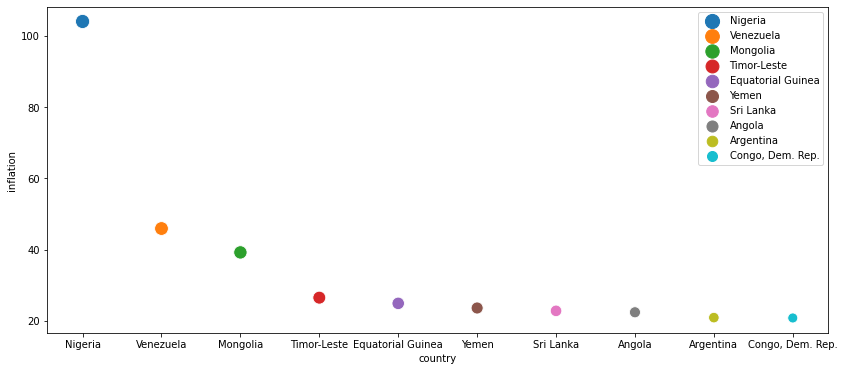

In [43]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="inflation", 
                data=data.nlargest(10,'inflation'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

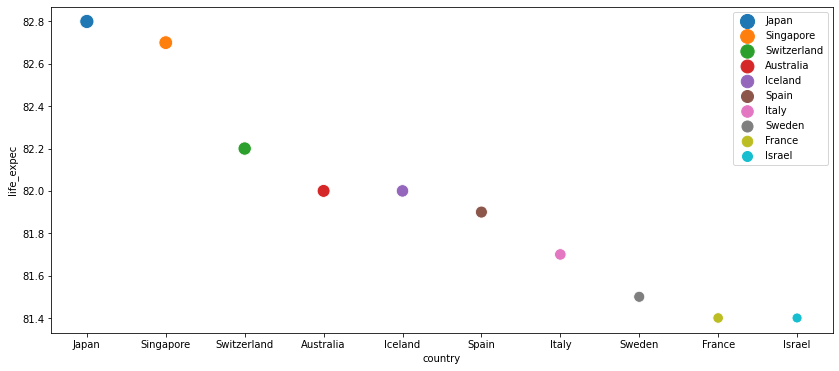

In [39]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="life_expec", 
                data=data.nlargest(10,'life_expec'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

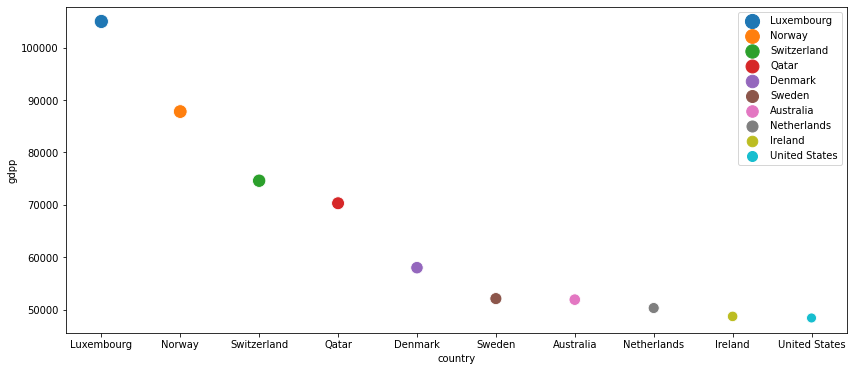

In [40]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="country", y="gdpp", 
                data=data.nlargest(10,'gdpp'), hue="country", size="country",  sizes=(100, 200))

plt.legend(bbox_to_anchor=(1, 1))

# Coercing Outliers 

In [5]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

X =data.drop(["country"],axis=1)

for cols in X:
   upper_bound,lower_bound = outlier_detection(X[cols])
   X[cols] = np.clip(X[cols],a_min=lower_bound,a_max=upper_bound)

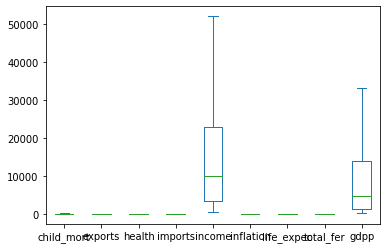

In [6]:
#Checking outliers again
X.plot(kind='box')

# Scaling

In [7]:
# Scaling dataset through StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

# Elbow Method

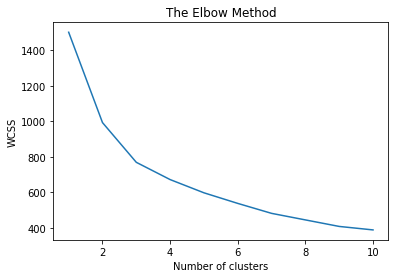

In [8]:
# determine the number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means

In [9]:
# Fit the model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [13]:
# add predicted output to the dataset
data['Cluster_KM'] = kmeans.labels_
data.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KM
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [14]:
# check the number of values in every cluster
data.Cluster_KM.value_counts(ascending=True)

0    41
1    48
2    78
Name: Cluster_KM, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


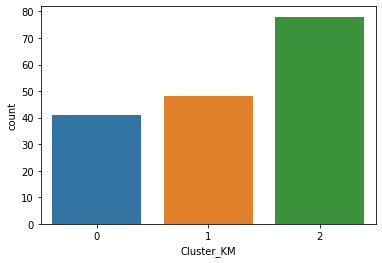

In [16]:
# Visualize clusters
sns.countplot(data.Cluster_KM)

In [17]:
# Check the countries in every cluster
print("Cluster 0 of KMeans model, Developed Countries")
print(data[data['Cluster_KM'] == 0].country.unique())

Cluster 0 of KMeans model, Developed Countries
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Portugal' 'Qatar' 'Saudi Arabia' 'Singapore' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


In [18]:
print("Cluster 1 of KMeans model, Under-developing Countries")
print(data[data['Cluster_KM'] == 1].country.unique())

Cluster 1 of KMeans model, Under-developing Countries
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']


In [20]:
print("Cluster 2 of KMeans model, Developing Countries ")
print(data[data['Cluster_KM'] == 2].country.unique())

Cluster 2 of KMeans model, Developing Countries 
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius'
 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Nepal' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania'
 'Russia' 'Samoa' 'Serbia' 'Seychelles' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']


# Hierarchical Clustering

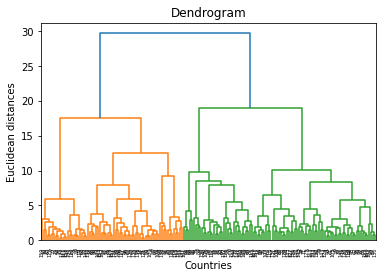

In [21]:
# Visualize dendogram to see how many clusters are needed
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
# Fit the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [23]:
hc.labels_

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2])

In [24]:
# add predicted output to the dataset
data['Cluster_HC'] = hc.labels_
data.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KM,Cluster_HC
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,2
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2,1
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2,1
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2,1
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,0,0
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,0,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2,1


In [27]:
# check the number of values in every cluster and visualize 
data.Cluster_HC.value_counts(ascending=True)

2    35
1    61
0    71
Name: Cluster_HC, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


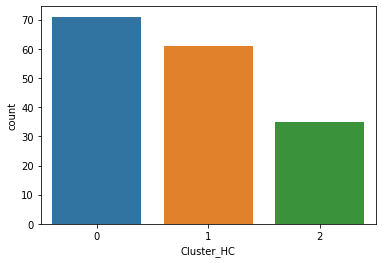

In [28]:
sns.countplot(data.Cluster_HC)

In [29]:
print("Cluster 0 of Hierarchical Clustering model, Developed Countries")
print(data[data['Cluster_HC'] == 0].country.unique())

Cluster 0 of Hierarchical Clustering model, Developing Countries
['Antigua and Barbuda' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Barbados' 'Belgium' 'Belize' 'Bhutan' 'Brunei' 'Bulgaria' 'Cambodia'
 'Canada' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Fiji'
 'Finland' 'France' 'Germany' 'Greece' 'Guyana' 'Hungary' 'Iceland'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Jordan' 'Kuwait' 'Kyrgyz Republic'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Montenegro' 'Netherlands'
 'New Zealand' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Poland' 'Portugal'
 'Qatar' 'Saudi Arabia' 'Seychelles' 'Singapore' 'Slovak Republic'
 'Slovenia' 'Solomon Islands' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Tunisia' 'Turkmenistan' 'United Arab Emirates'
 'United Kingdom' 'United States' 'Vanuatu' 'Vietnam']


In [30]:
print("Cluster 1 of Hierarchical Clustering model, Developing")
print(data[data['Cluster_HC'] == 1].country.unique())

Cluster 1 of Hierarchical Clustering model, Under-Developed
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Gabon'
 'Gambia' 'Georgia' 'Grenada' 'Guatemala' 'India' 'Indonesia' 'Iran'
 'Jamaica' 'Kazakhstan' 'Kenya' 'Lao' 'Madagascar' 'Moldova' 'Mongolia'
 'Morocco' 'Myanmar' 'Namibia' 'Nepal' 'Pakistan' 'Peru' 'Philippines'
 'Romania' 'Russia' 'Samoa' 'Senegal' 'Serbia' 'South Africa' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Tanzania'
 'Tonga' 'Turkey' 'Ukraine' 'Uruguay' 'Uzbekistan' 'Venezuela']


In [31]:
print("Cluster 2 of Hierarchical Clustering model, under-developed")
print(data[data['Cluster_HC'] == 2].country.unique())

Cluster 2 of Hierarchical Clustering model, Developed COuntries
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo, Dem. Rep.' 'Congo, Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Haiti' 'Iraq' 'Kiribati' 'Lesotho' 'Liberia' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mozambique' 'Niger' 'Nigeria'
 'Rwanda' 'Sierra Leone' 'Sudan' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen'
 'Zambia']
